In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

%matplotlib notebook

### Note: Data obtained from UCI <http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io>.

In [2]:
#read in data and 
mush_df = pd.read_csv('mushrooms.csv')

#use pd.get_dummies to convert the categorical variables into indicator variables
mush_df2 = pd.get_dummies(mush_df)


X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

In [4]:
#define & fit the DT classifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)

#exctract indicies of most important five features
index_top5 = np.argsort(clf.feature_importances_)[-5:][::-1]

#use above indicies to get most important features
top_5 = X_train2.columns[index_top5]

#print out feature and importance
for i, feature in enumerate(top_5):
    print('{}) {}: {:.3f}'.format(i+1, top_5[i], clf.feature_importances_[index_top5[i]]))

1) odor_n: 0.625
2) stalk-root_c: 0.169
3) stalk-root_r: 0.087
4) spore-print-color_r: 0.034
5) odor_l: 0.024


<IPython.core.display.Javascript object>


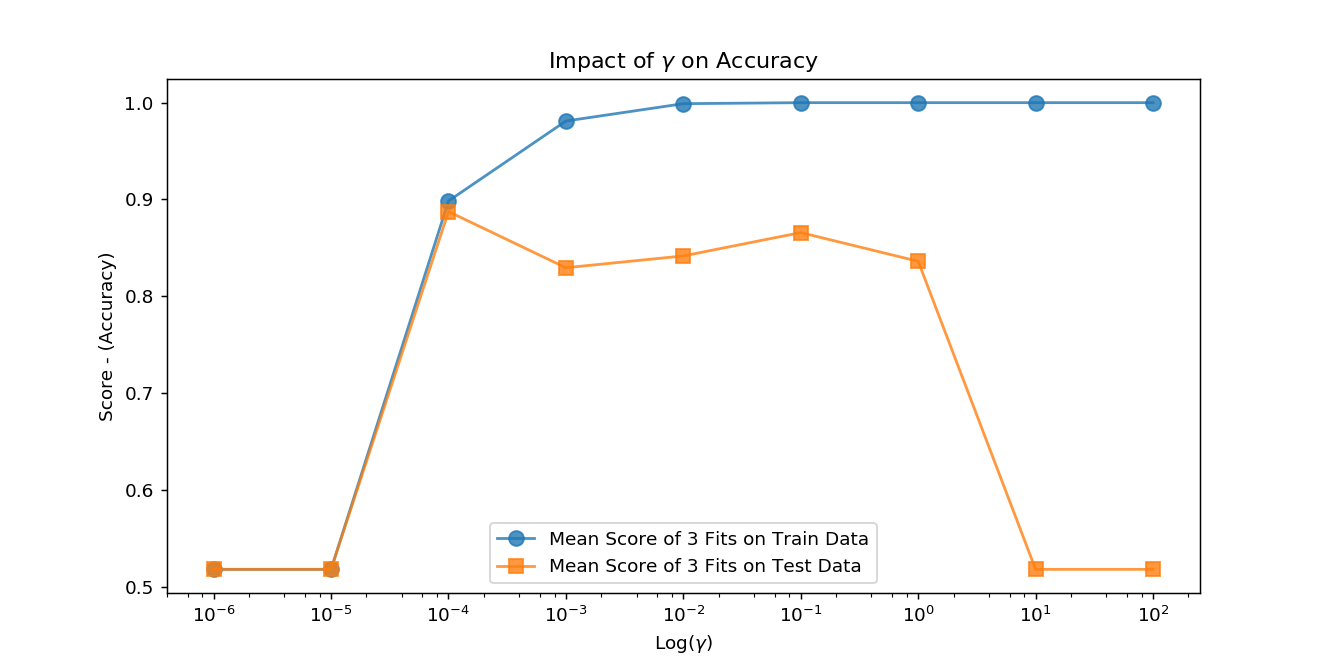

In [8]:
#define sweep of parameter - Note: this takes a while as we're sweeping 9 orders of magnitude
param_range = np.logspace(-6, 2, 9)

#get train/test scores for different param (gamma) values
train_scores, test_scores = validation_curve(SVC(kernel='rbf', C=1.0, random_state=0), 
                                             X_mush, y_mush, param_name="gamma", param_range=param_range)

#get mean of 3 fits for each gamma value
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#plot the results
plt.figure(figsize=(10,5))
plt.semilogx(param_range, train_scores_mean, '-o', label='Mean Score of 3 Fits on Train Data', markersize=8, alpha=0.8)
plt.semilogx(param_range, test_scores_mean, '-s', label='Mean Score of 3 Fits on Test Data', markersize=8, alpha=0.8)
plt.xlabel('Log($\gamma$)')
plt.ylabel('Score - (Accuracy)')
plt.title('Impact of $\gamma$ on Accuracy')                                            
plt.legend()